In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import uproot_methods

In [4]:
import libwwz

In [5]:
import uproot
import os
import numpy as np
import pandas as pd
import argparse


def decode_keys(d):
    for k in list(d.keys()):
        d[k.decode("utf-8")] = d.pop(k)
    return d


def print_df_repeated_header(df, n_repeat_header=50):
    index_width = max([len(b) for b in df.index])
    padded_index = [b + " " * (index_width - len(b)) for b in df.index]
    n_repeat_header = 30
    i = 0
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        while i < len(df):
            df_slice = df[i : i + n_repeat_header]
            df_slice.index = padded_index[i : i + n_repeat_header]
            print()
            print(df_slice)
            i += n_repeat_header

In [6]:
from geeksw.utils.core import concatenate
from geeksw.utils.data_loader_tools import make_data_loader, TreeWrapper, list_root_files_recursively

In [9]:
baby_file = "/home/llr/cms/rembser/scratch/baby-ntuples/WVZMVA2017_v0.1.21/wwz_4l2v_amcatnlo_1.root"
nano_dir = "/scratch/store/mc/RunIIFall17NanoAODv6/WWZJetsTo4L2Nu_4f_TuneCP5_13TeV_amcatnloFXFX_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano25Oct2019_102X_mc2017_realistic_v7-v1"

nano_files = list_root_files_recursively(nano_dir)

In [10]:


baby = uproot.open(baby_file)["t"]
baby_event = baby.array("evt")

print(baby.array("evt_scale1fb")[0])

all_branches = list(set([br.decode("utf-8") for br in baby.keys()]))

#nanos = [TreeWrapper(uproot.open(nano)["Events"], n_max_events=100) for nano in nano_files]

    
is_data = False
lumi = 0.0

-3.497364e-07


In [11]:
producers = {
    "VetoNoIsoElectron_pt" : lambda d : d["UncorrElectron_pt"][d["Electron_veto_mask_noiso"]],
    "VetoNoIsoElectron_eta" : lambda d : d["Electron_eta"][d["Electron_veto_mask_noiso"]],
    "VetoNoIsoElectron_phi" : lambda d : d["Electron_phi"][d["Electron_veto_mask_noiso"]],
    "VetoNoIsoElectron_mass" : lambda d : d["Electron_mass"][d["Electron_veto_mask_noiso"]],
    "VetoNoIsoElectron_pfRelIso03_all" : lambda d : d["Electron_pfRelIso03_all"][d["Electron_veto_mask_noiso"]],
    "VetoNoIsoElectron_relIso03EAv4wLep" : lambda d : d["Electron_relIso03EAv4wLep"][d["Electron_veto_mask_noiso"]],

    "VetoNoIsoMuon_pt" : lambda d : d["Muon_pt"][d["Muon_veto_mask_noiso"]],
    "VetoNoIsoMuon_eta" : lambda d : d["Muon_eta"][d["Muon_veto_mask_noiso"]],
    "VetoNoIsoMuon_phi" : lambda d : d["Muon_phi"][d["Muon_veto_mask_noiso"]],
    "VetoNoIsoMuon_mass" : lambda d : d["Muon_mass"][d["Muon_veto_mask_noiso"]],
    "VetoNoIsoMuon_pfRelIso03_all" : lambda d : d["Muon_pfRelIso03_all"][d["Muon_veto_mask_noiso"]],
    "VetoNoIsoMuon_relIso03EAv4wLep" : lambda d : d["Muon_relIso03EAv4wLep"][d["Muon_veto_mask_noiso"]],

    **libwwz.producers.mc_producers
}

In [12]:
columns = [
    "VetoNoIsoElectron_pt",
    "VetoNoIsoElectron_eta",
    "VetoNoIsoElectron_phi",
    "VetoNoIsoElectron_mass",
    "VetoNoIsoElectron_pfRelIso03_all",
    "VetoNoIsoElectron_relIso03EAv4wLep",
    "VetoNoIsoMuon_pt",
    "VetoNoIsoMuon_eta",
    "VetoNoIsoMuon_phi",
    "VetoNoIsoMuon_mass",
    "VetoNoIsoMuon_pfRelIso03_all",
    "VetoNoIsoMuon_relIso03EAv4wLep",
    *libwwz.output.columns
]

In [13]:
data_loader = make_data_loader(columns, producers, verbosity=0)

In [14]:

datas = []

skim = libwwz.skims.four_lepton_skim

for i_nano_file, nano_file in enumerate(nano_files):
    print(nano_file)
    nano = TreeWrapper(uproot.open(nano_file)["Events"], n_max_events=300)
    
    data = skim(data_loader(nano))
    
    df = pd.DataFrame(data={"event" : data["evt"]})
    
    print(len(df))
    
    #df.to_parquet("df_{i_nano_file}.parquet.gzip", compression="gzip", index=False)
    df.to_parquet(f"part{i_nano_file}.parquet", compression=None, index=False)
    
    datas.append(data)
        
data = dict()
for column in datas[-1].keys():
    data[column] = concatenate([d[column] for d in datas])

/scratch/store/mc/RunIIFall17NanoAODv6/WWZJetsTo4L2Nu_4f_TuneCP5_13TeV_amcatnloFXFX_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano25Oct2019_102X_mc2017_realistic_v7-v1/280000/6E08B90D-2C44-464C-9DAD-E85C3046D28D.root
130
/scratch/store/mc/RunIIFall17NanoAODv6/WWZJetsTo4L2Nu_4f_TuneCP5_13TeV_amcatnloFXFX_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano25Oct2019_102X_mc2017_realistic_v7-v1/280000/09D74D3B-6F3F-0F43-99EA-A67CE3918FAE.root
136
/scratch/store/mc/RunIIFall17NanoAODv6/WWZJetsTo4L2Nu_4f_TuneCP5_13TeV_amcatnloFXFX_pythia8/NANOAODSIM/PU2017_12Apr2018_Nano25Oct2019_102X_mc2017_realistic_v7-v1/280000/7FA1CC12-0C8D-C94C-96F9-3505CEF8FE8B.root
129


In [15]:

nano_event = data["evt"]

n_overlap = np.sum(np.in1d(nano_event, baby_event))
n_nano = len(nano_event)
n_baby = len(baby_event)

print()
print("Overlapping events:", n_overlap)
print("Events only in nano:", n_nano - n_overlap)
print("Events only in baby:", n_baby - n_overlap)
print()

_, nano_idx, baby_idx = np.intersect1d(nano_event, baby_event, return_indices=True)


Overlapping events: 395
Events only in nano: 0
Events only in baby: 873573



In [16]:
def kinematics_comparison_plot(baby_variable="lep_pt",
                               nano_variable="pt",
                               bins=np.linspace(0,200,200),
                               particle="Electron"):
    
    particle = "VetoNoIso" + particle
        
    assert(particle in ["VetoNoIsoElectron", "VetoNoIsoMuon"])

    lep_id = 11 if "Electron" in particle else 13

    electron_mask = np.abs(baby.array("lep_id")) == lep_id
    
    baby_values = baby.array(baby_variable)[electron_mask]
    baby_events = baby.array("evt")
    idx = baby_values.counts.argmax()
    label = particle + " " + baby_variable

    nano_values = data[particle + "_" + nano_variable]
    print(label)
    print("=" * len(label))
    print(f"Values in event {baby_events[idx]} (the exent with the most objects)")
    print("baby: ", baby_values[idx])
    print("nano: ", nano_values[np.argmax(data["evt"] == baby_events[idx])])

    plt.hist(baby_values.flatten(), bins, histtype="step", label="BABY")
    plt.hist(nano_values.flatten(), bins, histtype="step", label="NANO")

    plt.legend(loc="upper right")
    #plt.gca().set_yscale("log", nonposy='clip')
    plt.xlabel(label)
    plt.ylabel("Events")
    #plt.savefig(particle + "_" + baby_variable + ".png", dpi=300)
    plt.show()

VetoNoIsoElectron lep_pt
Values in event 1567918 (the exent with the most objects)
baby:  [195.77493   99.263306  59.494865  54.603233  32.166115  18.038237]
nano:  [138.40671]


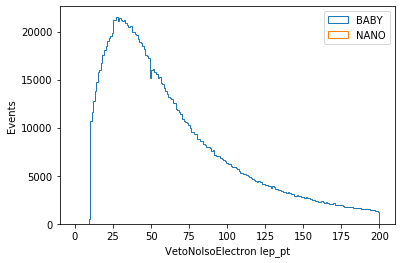

VetoNoIsoElectron lep_eta
Values in event 1567918 (the exent with the most objects)
baby:  [ 2.0434613  1.1090504  1.1678052  1.9221052  2.367174  -1.1214471]
nano:  [0.5383301]


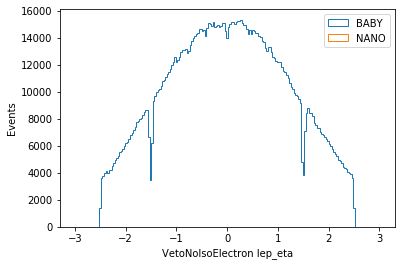

VetoNoIsoMuon lep_pt
Values in event 1995305 (the exent with the most objects)
baby:  [95.35774  59.53778  58.98919  29.124556 25.567905 12.981443]
nano:  [497.66345 270.15543  59.80052]


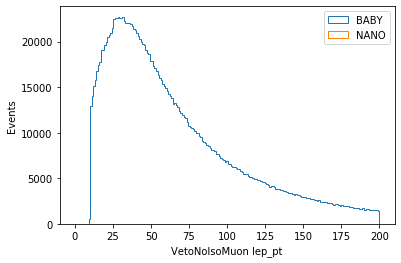

VetoNoIsoMuon lep_eta
Values in event 1995305 (the exent with the most objects)
baby:  [0.6956149 1.7361822 0.5018749 2.2940435 2.319182  0.5227505]
nano:  [1.0720215  0.88500977 1.5       ]


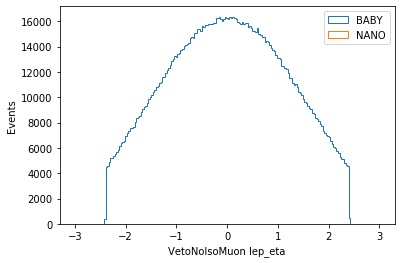

In [17]:
pt_bins = np.linspace(0,200,200)
eta_bins = np.linspace(-3, 3,200)

kinematics_comparison_plot("lep_pt", "pt", pt_bins, "Electron")
kinematics_comparison_plot("lep_eta", "eta", eta_bins, "Electron")
kinematics_comparison_plot("lep_pt", "pt", pt_bins, "Muon")
kinematics_comparison_plot("lep_eta", "eta", eta_bins, "Muon")

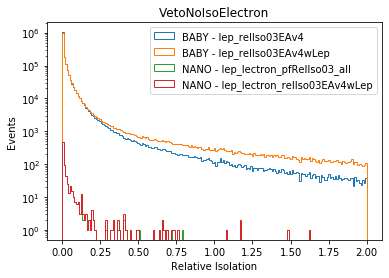

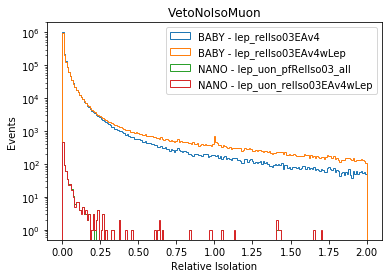

In [18]:
for particle in ["VetoNoIsoElectron", "VetoNoIsoMuon"]:
    
    lep_id = 11 if "Electron" in particle else 13

    electron_mask = np.abs(baby.array("lep_id")) == lep_id
    bins = np.linspace(0,2,200)

    baby_pt = baby.array("lep_pt")[electron_mask].flatten()

    for var in ["lep_relIso03EAv4", "lep_relIso03EAv4wLep"]:
        plt.hist(baby.array(var)[electron_mask].flatten(),# * baby_pt,
                 bins, histtype="step",
                 label="BABY - " + var)

    for var in [particle + "_pfRelIso03_all", particle + "_relIso03EAv4wLep"]:
        plt.hist(data[var].flatten(),
                 bins, histtype="step",
                 label="NANO - lep_" + var[10:])

    plt.legend(loc="upper right")
    plt.gca().set_yscale("log", nonposy='clip')
    plt.title(particle)
    plt.xlabel("Relative Isolation")
    plt.ylabel("Events")
    plt.savefig(particle+"_isolation.png", dpi=300)
    plt.show()

In [19]:
nano.tree_.keys()

[b'run',
 b'luminosityBlock',
 b'event',
 b'HTXS_Higgs_pt',
 b'HTXS_Higgs_y',
 b'HTXS_stage1_1_cat_pTjet25GeV',
 b'HTXS_stage1_1_cat_pTjet30GeV',
 b'HTXS_stage1_1_fine_cat_pTjet25GeV',
 b'HTXS_stage1_1_fine_cat_pTjet30GeV',
 b'HTXS_stage_0',
 b'HTXS_stage_1_pTjet25',
 b'HTXS_stage_1_pTjet30',
 b'HTXS_njets25',
 b'HTXS_njets30',
 b'btagWeight_CSVV2',
 b'btagWeight_DeepCSVB',
 b'CaloMET_phi',
 b'CaloMET_pt',
 b'CaloMET_sumEt',
 b'ChsMET_phi',
 b'ChsMET_pt',
 b'ChsMET_sumEt',
 b'nCorrT1METJet',
 b'CorrT1METJet_area',
 b'CorrT1METJet_eta',
 b'CorrT1METJet_muonSubtrFactor',
 b'CorrT1METJet_phi',
 b'CorrT1METJet_rawPt',
 b'nElectron',
 b'Electron_deltaEtaSC',
 b'Electron_dr03EcalRecHitSumEt',
 b'Electron_dr03HcalDepth1TowerSumEt',
 b'Electron_dr03TkSumPt',
 b'Electron_dr03TkSumPtHEEP',
 b'Electron_dxy',
 b'Electron_dxyErr',
 b'Electron_dz',
 b'Electron_dzErr',
 b'Electron_eCorr',
 b'Electron_eInvMinusPInv',
 b'Electron_energyErr',
 b'Electron_eta',
 b'Electron_hoe',
 b'Electron_ip3d',
 b'Ele

In [20]:
df_info = pd.DataFrame(index=sorted(all_branches))

for branch in all_branches:
    if not branch in columns:
        continue

    #tgt = np.concatenate([converters[branch](nano)[nano_idx] for nano, nano_idx in zip(nanos, nano_indices)])
    #nano_index = b
    tgt = data[branch][nano_idx]
    ref = baby.array(branch)[baby_idx]

    df_info.loc[branch, "exact match [%]"] = (tgt == ref).sum() * 100.0 / len(tgt)
    df_info.loc[branch, "float match [%]"] = np.abs(((tgt - ref) / ref) < 1e-6).sum() * 100.0 / len(tgt)
    df_info.loc[branch, "bias [tgt - ref]"] = np.mean(tgt - ref)

#print_df_repeated_header(df_info)

/home/llr/cms/rembser/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/llr/cms/rembser/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/home/llr/cms/rembser/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


In [21]:
df_info.dropna()

,exact match [%],float match [%],bias [tgt - ref]
evt,100.000000,100.000000,0.000000
evt_passgoodrunlist,100.000000,100.000000,0.000000
evt_scale1fb,0.000000,5.063291,1.000000
firstgoodvertex,100.000000,0.000000,0.000000
hasTau,0.759494,0.759494,0.992405
isData,100.000000,0.000000,0.000000
lumi,100.000000,100.000000,0.000000
met_gen_phi,0.000000,50.632911,-0.000027
met_gen_pt,0.000000,48.860759,0.001452
nTrueInt,100.000000,100.000000,0.000000


In [22]:
baby.array("lep_pt")

<JaggedArray [[87.86332 84.658226 49.706894 25.335981] [66.51936 37.998196 33.62712 15.043882] [137.16824 136.08716 125.12341 27.392124] ... [75.53534 70.00876 47.60255 42.994022] [284.14337 279.74268 55.885025 31.310638] [106.2479 34.376465 24.01683 11.655056]] at 0x7f4c09b18f28>

In [28]:
df_info.dropna().index

Index(['evt', 'evt_passgoodrunlist', 'evt_scale1fb', 'firstgoodvertex',
       'hasTau', 'isData', 'lumi', 'met_gen_phi', 'met_gen_pt', 'nTrueInt',
       'nvtx', 'passesMETfiltersRun2', 'run', 'xsec_br'],
      dtype='object')

In [23]:
import pyarrow.parquet as pq

In [24]:
ls

df_{i_nano_file}.parquet.gzip  part2.parquet
Electron_isolation.png         VetoNoIsoElectron_isolation.png
Muon_isolation.png             VetoNoIsoMuon_isolation.png
part0.parquet                  Workspace-Copy1.ipynb
part1.parquet                  Workspace.ipynb


In [31]:
dataset = pq.ParquetDataset("/home/llr/cms/rembser/WWZ-leptonic-EFT-analysis/skims/2017_WWZ_for_jetmet_sync")

In [32]:
dataset.read_pandas().to_pandas()

,evt,evt_passgoodrunlist,evt_scale1fb,firstgoodvertex,hasTau,isData,lumi,met_gen_phi,met_gen_pt,nTrueInt,nvtx,passesMETfiltersRun2,run,xsec_br
0,503,True,1.0,0,True,False,2,0.957520,37.437500,25.0,24,True,1,1.0
1,502,True,1.0,0,True,False,2,-0.895020,31.546875,31.0,27,True,1,1.0
2,505,True,1.0,0,True,False,2,-1.295898,64.687500,42.0,31,True,1,1.0
3,506,True,1.0,0,True,False,2,-0.474365,87.000000,29.0,26,True,1,1.0
4,509,True,1.0,0,True,False,2,1.686523,77.562500,26.0,24,True,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874465,1805500,True,1.0,0,True,False,3611,-2.271484,99.062500,22.0,11,True,1,1.0
874466,1805482,True,1.0,0,True,False,3611,3.041016,121.625000,41.0,42,False,1,1.0
874467,1805484,True,1.0,0,True,False,3611,1.359375,111.687500,64.0,42,True,1,1.0
874468,1805490,True,1.0,0,True,False,3611,-2.826172,53.843750,45.0,33,True,1,1.0
